## Projeto: Analisando as vendas do ano de 2020 de uma empresa

#### Quais perguntas pretendo responder nesse dataset

Nesse projeto de análise de vendas do ano de 2020 de uma empresa de patches, busco responder algumas perguntas críticas no que diz respeito à receitas totais mensais, receitas por região, os melhores dias de vendas, qual a maior frequência de unidades por pedido, e qual a melhor combinação de patches de estoque para venda antecipada no e-commerce.

#### Aqui os pacotes para análise, limpeza e transformação dos dados

In [1]:
# importando os pacotes necessários para maniluparmos e analisarmos as vendas
import pandas as pd
import numpy as np
import matplotlib as plt

### Transformação e limpeza dos dados

Nessa seção irei entender os dados, o que significa cada coluna e seus registros. Para depois, buscar valores nulos, valores ducplicados, valores extremos utilizando os pacotes pandas para limpeza e transformação, numpy e matplotlib para visualização dos dados.

In [2]:
# lendo o dataset com o read_excel, função do pandas
df = pd.read_excel('vendas2020.xlsx')

In [3]:
# quantidade de linhas e colunas
df.shape

(7109, 36)

In [4]:
# olhando as primeiras linhas do dataset
df.head()

,ID,N° do Pedido,N° do Pedido na Loja Virtual,Data,ID contato,Nome do contato,Cpf/Cnpj,Endereco,Bairro,Município,...,Código do produto,Frete proporcional,Desconto proporcional,Vendedor,Nº da NFe,Natureza da NFe,Situação da NFe,Última ocorrência,Outras despesas,Outras despesas proporcional
0,7257920757,410,4319.0,2020-01-01,6893549261,Matheus Oliveira Lima,139.408.067-06,"Rua Luís Guimarães, 56, 202",Vila Isabel,Rio de Janeiro,...,EP1524,8.0,0.0,E-commerce,314.0,Venda de mercadorias,Emitida,2020-01-07 16:33:00,0,0
1,7257920766,411,4321.0,2020-01-01,7257920762,Lucas Jarina Araujo,424.879.858-10,"Rua Bezerra Paes, 1519, Casa",Jardim Belém,Descalvado,...,EP739,8.0,0.0,E-commerce,315.0,Venda de mercadorias,Emitida,2020-01-07 16:33:00,0,0
2,7257920788,412,4322.0,2020-01-01,7257920778,Luciano Tavares,382.420.019-87,"Rua Bagé, 188, Ap 304",Anita Garibaldi,Joinville,...,EP192,8.0,0.0,E-commerce,316.0,Venda de mercadorias,Emitida,2020-01-07 16:33:00,0,0
3,7257920806,413,4323.0,2020-01-02,7257920796,Lucas Skrock,094.709.099-17,"Rua Alberto Otto, 503, Casa",Santa Cândida,Curitiba,...,EP887,2.0,0.0,E-commerce,317.0,Venda de mercadorias,Emitida,2020-01-07 16:33:00,0,0
4,7257920806,413,4323.0,2020-01-02,7257920796,Lucas Skrock,094.709.099-17,"Rua Alberto Otto, 503, Casa",Santa Cândida,Curitiba,...,EP619,2.0,0.0,E-commerce,317.0,Venda de mercadorias,Emitida,2020-01-07 16:33:00,0,0


> Olhando os registros do dataseet, tomo a decisão de excluir algumas colunas porque entendo que não há necessidade de incluí-las nas análises. Acredito que o número do pedido seja bastante relevante, pois conseguiria contar a quantidade pedidos do ano todo. A coluna 'Cpf/Cnpj' para analisar o impacto de clientes pessoa física e pessoa jurídica nas receitas totais. Colunas como 'id' e 'Natureza da NF' não há necessidade e não impactará nas análises.

In [5]:
# diminuindo a quantidade de colunas no dataset
vendas = df[['N° do Pedido', 'Data', 'Nome do contato', 'Cpf/Cnpj', 'Estado', 'Município', 'Código do produto', 'Descrição', 'Quantidade', 'Preço Total']]
vendas.head(2)

,N° do Pedido,Data,Nome do contato,Cpf/Cnpj,Estado,Município,Código do produto,Descrição,Quantidade,Preço Total
0,410,2020-01-01,Matheus Oliveira Lima,139.408.067-06,RJ,Rio de Janeiro,EP1524,Patch Emborrachado Bandeira do Brasil,2,42.98
1,411,2020-01-01,Lucas Jarina Araujo,424.879.858-10,SP,Descalvado,EP739,Patch Bordado Soutache Personalizado Tipo Sang...,1,15.49


In [6]:
#Incluindo a coluna mês
vendas['mes'] = pd.DatetimeIndex(vendas['Data']).month
vendas.head(2)

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,N° do Pedido,Data,Nome do contato,Cpf/Cnpj,Estado,Município,Código do produto,Descrição,Quantidade,Preço Total,mes
0,410,2020-01-01,Matheus Oliveira Lima,139.408.067-06,RJ,Rio de Janeiro,EP1524,Patch Emborrachado Bandeira do Brasil,2,42.98,1
1,411,2020-01-01,Lucas Jarina Araujo,424.879.858-10,SP,Descalvado,EP739,Patch Bordado Soutache Personalizado Tipo Sang...,1,15.49,1


In [7]:
# incluindo uma coluna dia da semana
vendas['dia'] = pd.DatetimeIndex(vendas['Data']).day
vendas.head(5)

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,N° do Pedido,Data,Nome do contato,Cpf/Cnpj,Estado,Município,Código do produto,Descrição,Quantidade,Preço Total,mes,dia
0,410,2020-01-01,Matheus Oliveira Lima,139.408.067-06,RJ,Rio de Janeiro,EP1524,Patch Emborrachado Bandeira do Brasil,2,42.98,1,1
1,411,2020-01-01,Lucas Jarina Araujo,424.879.858-10,SP,Descalvado,EP739,Patch Bordado Soutache Personalizado Tipo Sang...,1,15.49,1,1
2,412,2020-01-01,Luciano Tavares,382.420.019-87,SC,Joinville,EP192,Patch Bordado Brazilian Veteran | Veterano bra...,1,15.49,1,1
3,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP887,Patch bordado MAD MAX - I Witness Me,1,13.49,1,2
4,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP619,Patch Bordado Stars (Resident Evil),1,13.49,1,2


In [8]:
# principais estatísticas das colunas numéricas
vendas.describe()

,N° do Pedido,Quantidade,Preço Total,mes,dia
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000
mean,1743.521311,7.369532,71.100995,7.019131,15.500352
std,802.927135,91.784297,619.513247,3.319199,9.047079
min,393.000000,1.000000,0.000000,1.000000,1.000000
25%,1037.000000,1.000000,9.990000,4.000000,8.000000
50%,1742.000000,1.000000,13.490000,7.000000,15.000000
75%,2423.000000,2.000000,24.000000,10.000000,24.000000
max,3148.000000,7000.000000,46900.000000,12.000000,31.000000


> Na tabela de resumo estatístico percebemos que a quantidade média de unidades é de 7 patches e 75% das quantidades estão em 2 unidades. É bastante relevante. O preço total também está com uma média bem baixa em relação ao malor máximo, desse modo há uma grande possibilidade de valores extremos aqui. A mediana de quantidade é de 1 unidade de patch, isso provavelmente diz respeito a estrutura de lançamentos dos pedidos de vendas. Pelo que percebi, um produto por linha. A variável 'preço_total' está com valor zero no valor mínimo creio ser algum erro nos lançamentos.

In [9]:
# a variável 'preço total' contém valor zero nos valores mínimos
# verificando esses lançamentos
vendas.loc[vendas['Preço Total'] == 0].count()

N° do Pedido         48
Data                 48
Nome do contato      48
Cpf/Cnpj             48
Estado               48
Município            48
Código do produto    47
Descrição            48
Quantidade           48
Preço Total          48
mes                  48
dia                  48
dtype: int64

In [10]:
# resolvi criar um novo dataset filtrando os dados de preço total maiores que 0.
vendas = vendas.loc[vendas['Preço Total'] > 0]
vendas.describe()

,N° do Pedido,Quantidade,Preço Total,mes,dia
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000
mean,1738.310721,7.407591,71.584332,6.998867,15.479111
std,802.759592,92.094514,621.587839,3.320167,9.049644
min,393.000000,1.000000,5.550000,1.000000,1.000000
25%,1034.000000,1.000000,9.990000,4.000000,8.000000
50%,1739.000000,1.000000,13.490000,7.000000,15.000000
75%,2421.000000,2.000000,24.270000,10.000000,24.000000
max,3148.000000,7000.000000,46900.000000,12.000000,31.000000


In [11]:
# excluindo as vendas do projeto invictus, pois influenciria nas vendas
vendas = vendas.loc[vendas['Nome do contato'] != 'União Suprimentos Militares Ltda.']
vendas.head()

,N° do Pedido,Data,Nome do contato,Cpf/Cnpj,Estado,Município,Código do produto,Descrição,Quantidade,Preço Total,mes,dia
0,410,2020-01-01,Matheus Oliveira Lima,139.408.067-06,RJ,Rio de Janeiro,EP1524,Patch Emborrachado Bandeira do Brasil,2,42.98,1,1
1,411,2020-01-01,Lucas Jarina Araujo,424.879.858-10,SP,Descalvado,EP739,Patch Bordado Soutache Personalizado Tipo Sang...,1,15.49,1,1
2,412,2020-01-01,Luciano Tavares,382.420.019-87,SC,Joinville,EP192,Patch Bordado Brazilian Veteran | Veterano bra...,1,15.49,1,1
3,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP887,Patch bordado MAD MAX - I Witness Me,1,13.49,1,2
4,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP619,Patch Bordado Stars (Resident Evil),1,13.49,1,2


> Sabendo que a empresa teve uma venda significativa para o cliente chamado 'União Suprimentos Militares Ltda.', resolvi excluir todos os lançamentos pertinentes a esse cliente, para não distorcer os resultados. Um projeto grande que ocorreu no mês de agosto de 2020.

In [12]:
# soma das vendas com o dataset original
df['Preço Total'].sum()

505456.97

In [13]:
# aqui prova que a exclusão da venda 'União Suprimentos Militares Ltda.' aconteceu
# bastante impactante
vendas['Preço Total'].sum()

360200.97000000003

In [14]:
# quantidade de patches vendidos
vendas.Quantidade.sum()

30625

In [15]:
# pra facilitar as análises com os cabeçalhos, vou colocar em letras mnúsculas e incluir o underline
# encontrei um tutorial em:
# https://www.alura.com.br/artigos/manipulacao-de-strings-no-pandas-lower-replace-startswith-e-contains
vendas.columns = vendas.columns.str.lower().str.replace(' ', '_')
vendas.columns = vendas.columns.str.lower().str.replace('/', '_')
vendas.head()

,n°_do_pedido,data,nome_do_contato,cpf_cnpj,estado,município,código_do_produto,descrição,quantidade,preço_total,mes,dia
0,410,2020-01-01,Matheus Oliveira Lima,139.408.067-06,RJ,Rio de Janeiro,EP1524,Patch Emborrachado Bandeira do Brasil,2,42.98,1,1
1,411,2020-01-01,Lucas Jarina Araujo,424.879.858-10,SP,Descalvado,EP739,Patch Bordado Soutache Personalizado Tipo Sang...,1,15.49,1,1
2,412,2020-01-01,Luciano Tavares,382.420.019-87,SC,Joinville,EP192,Patch Bordado Brazilian Veteran | Veterano bra...,1,15.49,1,1
3,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP887,Patch bordado MAD MAX - I Witness Me,1,13.49,1,2
4,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP619,Patch Bordado Stars (Resident Evil),1,13.49,1,2


In [16]:
# verificando os tipos de dados e valores nulos
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 0 to 7108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   n°_do_pedido       6992 non-null   int64         
 1   data               6992 non-null   datetime64[ns]
 2   nome_do_contato    6992 non-null   object        
 3   cpf_cnpj           6992 non-null   object        
 4   estado             6992 non-null   object        
 5   município          6979 non-null   object        
 6   código_do_produto  6948 non-null   object        
 7   descrição          6992 non-null   object        
 8   quantidade         6992 non-null   int64         
 9   preço_total        6992 non-null   float64       
 10  mes                6992 non-null   int64         
 11  dia                6992 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 710.1+ KB


In [17]:
# averiguando mais a fundo os valores nulos na coluna município
vendas.município.isnull().sum()

13

In [18]:
# tratando a coluna 'município' colocando a frase 'Não informado'
vendas.update(vendas['município'].fillna('Não informado'))
vendas.município.isnull().sum()

0

In [19]:
# averiguando mais a fundo os valores nulos na coluna 'código do produto'
vendas.código_do_produto.isnull().sum()

44

In [20]:
# eu decido colocar o número 'EP0', pois mais a frente farei análises pela descrição
vendas.update(vendas['código_do_produto'].fillna('EP0'))
vendas.município.isnull().sum()

0

In [21]:
# averiguando dados duplicados, se houver
sum(vendas.duplicated())

377

In [22]:
vendas.loc[vendas.duplicated()].head(5)

,n°_do_pedido,data,nome_do_contato,cpf_cnpj,estado,município,código_do_produto,descrição,quantidade,preço_total,mes,dia
35,475,2020-01-07,Diego Sancho,368.835.728-05,SP,São Paulo,EP376,Patch Bordado Bandeira Do Brasil Tática,1,15.49,1,7
36,475,2020-01-07,Diego Sancho,368.835.728-05,SP,São Paulo,EP376,Patch Bordado Bandeira Do Brasil Tática,1,15.49,1,7
41,428,2020-01-08,Sandro Barbosa abad,706.553.670-04,RS,Porto Alegre,EP732,Patch Bordado Personalizado com Programação Gr...,1,30.00,1,8
51,433,2020-01-09,Igor da silva Goulart,840.362.220-15,RS,Porto Alegre,PB8,Patch Bordado Personalizado - 8 cm,10,140.00,1,9
53,434,2020-01-09,Luis Antonio Vieira Freitas,267.015.020-91,RS,Nova Santa Rita,EP1038,Kit Basico Motociclista - Patches Personalizad...,1,95.99,1,9


In [23]:
vendas.loc[vendas['n°_do_pedido'] == 475]

,n°_do_pedido,data,nome_do_contato,cpf_cnpj,estado,município,código_do_produto,descrição,quantidade,preço_total,mes,dia
34,475,2020-01-07,Diego Sancho,368.835.728-05,SP,São Paulo,EP376,Patch Bordado Bandeira Do Brasil Tática,1,15.49,1,7
35,475,2020-01-07,Diego Sancho,368.835.728-05,SP,São Paulo,EP376,Patch Bordado Bandeira Do Brasil Tática,1,15.49,1,7
36,475,2020-01-07,Diego Sancho,368.835.728-05,SP,São Paulo,EP376,Patch Bordado Bandeira Do Brasil Tática,1,15.49,1,7


> Verficado a base de dados, percebo que não se trata de dados duplicados. Mas sim da estrututa na qual o usuário inseri os dados de vendas, linha por linha no caso. É importante ter acesso à base de dados para investigar melhor, para não excluir dados importantes por acidente. A venda do pedido '475' é um exemplo. Fui averiguar na base de dados e trata-se da forma como os produtos foram lançados, embora sejam o mesmo produto.

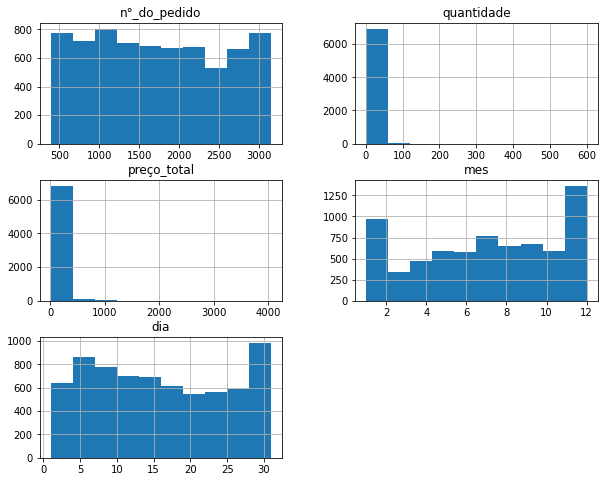

In [24]:
# verificando a distribuição dos dados
vendas.hist(figsize=(10,8));

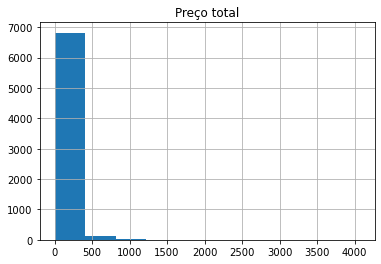

In [25]:
vendas.preço_total.hist();

import matplotlib.pyplot as plt

plt.title('Preço total')
plt.show()

> Verificando as distribuições dos dados quantitativos, noto que o preço total está concentrado até os R$ 1.000,00. Portanto resolvi plotar somente ele em uma outra escala, e bem menor esse número. As quantidades estão bem abaixo dos 100 unidades.

## Qual foi o melhor mês em vendas? Qual foi o total de vendas? Qual foi a tendência das vendas ?

In [22]:
# criando uma variável para armazenar o fatiamento do dataset
resultado = vendas.groupby('mes').agg({'preço_total': 'sum'})
resultado

,preço_total
mes,
1,22846.44
2,32022.61
3,20142.11
4,17280.04
5,27859.04
6,33026.64
7,36737.09
8,36570.50
9,32706.96


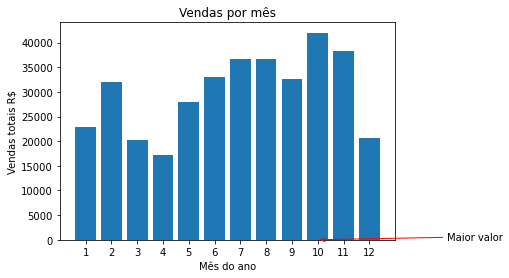

In [23]:
# aqui representei graficamente o desempenho das vendas por mês, sem os fretes.
import matplotlib.pyplot as plt

mes = range(1,13)

plt.bar(mes, resultado['preço_total'])
plt.xticks(mes)
plt.title('Vendas por mês')
plt.xlabel('Mês do ano')
plt.ylabel('Vendas totais R$')
plt.annotate('Maior valor', xy=(10, 11), xycoords='data', xytext=(15, 10),
            textcoords='data', arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color='red'))
plt.show()

> Claramente através do gráfico de barras o mês de outubro obteve a melhor performance, seguido mês de novembro. Vale destacar a performance positiva dos meses de junho e julho. Já os meses de Março e Abril tiveram as piores performances além do mês de dezembro. O ideal é fazer uma análise mais profunda do porque desses meses terem sido tão abaixos. Com mais dados internos e dados externos, por exemplo.

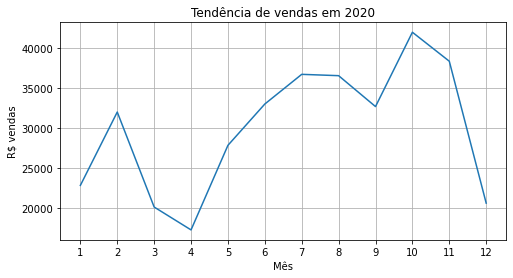

In [24]:
# plotei um gráfico de linha aonde mostra a tendência de vendas por mês
plt.figure(figsize=(8, 4))

vendas.groupby('mes')['preço_total'].sum().plot()

plt.xticks(range(1, 13))
plt.xlabel('Mês')
plt.ylabel('R$ vendas')
plt.title('Tendência de vendas em 2020')
plt.grid()
plt.show()

> O gráfico mostra um tendência de alta nas vendas a partir de abril, onde desse mês até novembro a empresa obteve bons resultados. Os períodos de fevereiro a março houve queda e de novembro à dezembro.

## Quais dias do mês são os mais comum para vendas ?

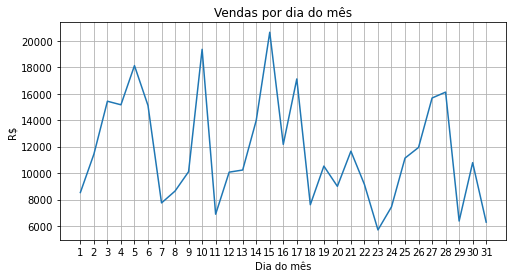

In [25]:
# plotando um gráfico para mostrar os dias de melhroes vendas 
dia = vendas.groupby('dia').agg({'preço_total': 'sum'})

plt.figure(figsize=(8, 4))

plt.plot(dia)
plt.xticks(range(1, 32))
plt.title('Vendas por dia do mês')
plt.xlabel('Dia do mês')
plt.ylabel('R$')
plt.grid()
plt.show()

> Como mostra o gráfico acima entre os dias 1 e 5 as vendas totalizaram R$ 180.000,00, no dia 10 há um alta nas vendas também até o dia 15. Há uma queda acentuada a partir do dia 16 até o dia 25. E na última semana há também uma alta nas vendas. Nitidamente na primeira metade do mês ocorreram as maiores receitas.

## Qual Estado do país nos comprou mais?

In [27]:
# utilizando o groupby para somar o total de vendas por estado e colocar em uma variável.
# depois filtrar pelos melhores resultados de vendas de acordo com um total mínimo.
# escolhi filtrar vendas totais de no mínimo R$ 10.000,00.
resultados = vendas.groupby('estado').agg({'preço_total': 'sum'})
resultados = resultados[resultados['preço_total'] >= 10000]
resultados['peso'] = resultados['preço_total'] / 359217.42 * 100 # criando uma coluna de peso % no total das receitas

resultados

,preço_total,peso
estado,,
DF,13314.31,3.706477
MG,17876.35,4.976471
MT,14256.24,3.968694
PR,26693.87,7.431118
RJ,31732.30,8.833731
RS,78341.81,21.809023
SC,33998.89,9.464711
SP,94909.15,26.421088


In [28]:
# a soma dos pesos desses estados, cujo o faturamento foi maior que R$ 10.000,00.
resultados.peso.sum()
# a soma deles impactam 86,41% total de faturamento no ano

86.61131189016476

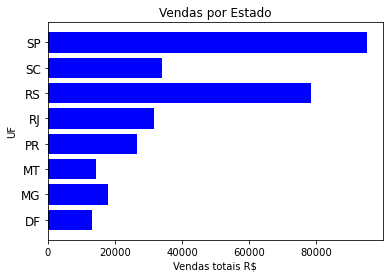

In [29]:
# criando uma variável que percorra a variável 'resultados'. Nela quero filtrar os estados que geraram mais receitas no ano.
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(6, 4))

estados = [estados for estados, resultados in resultados.groupby('estado')]

plt.barh(estados, resultados['preço_total'], color='blue')
plt.yticks(estados, size=12)
plt.title('Vendas por Estado')
plt.xlabel('Vendas totais R$')
plt.ylabel('UF')
plt.show()

## pelo gráfico e filtro com vendas no ano acima de R$ 10.000,00 os estados que mais compraram foram:
# São Paulo, Rio GRande do Sul, Santa Catarina, Rio de Janeiro, Paraná.

> O estado de São Paulo, junto com o Rio GRande do Sul foram os estados com melhores performances da empresa. São Paulo gerou aproximadamente 1/3 das vendas totais. Bastante expressivo. SP e RS juntos quase a metade do faturamento total. Santa Catarina e Rio de Janeiro também tiveram boa performance, 3° e 4° posição respectivamente.

## Qual o impacto de clientes Pessoa física e clientes Pessoa jurídica nas vendas? 

In [26]:
# criando uma função na qual faça o comprimento de caracteres na coluna 'Cpf/Cnpj'.
# em seguida criei uma coluna informando o total desses caracteres.
# sei que os registros de CPF tem o total de 14 caracteres, e CNPJ de 18 caracteres.

def tipo_cliente(x): # nome da função, junto com uma variável nela
    return len(x) # retorno da função dentro de uma outra função

tipo_cliente(vendas['cpf_cnpj'])

vendas['tipo_cliente'] = vendas['cpf_cnpj'].apply(tipo_cliente)

# criando uma função na qual substitua os valores 14 e 18 pelos nomes corretos de 'Pessoa física' e 'Pessoa jurídica'.
def tipo(num): 
    if num == 14: # estrutura if para buscar a variável igual a 14 caracteres      
        return 'pessoa_física'
    else: # se não, buscar a variável com 18 caracteres
        num == 18
        return 'pessoa_jurídica'

vendas['tipo_cliente'] = vendas['tipo_cliente'].map(tipo) # resolvi criar uma coluna 

vendas.head()

,n°_do_pedido,data,nome_do_contato,cpf_cnpj,estado,município,código_do_produto,descrição,quantidade,preço_total,mes,dia,tipo_cliente
0,410,2020-01-01,Matheus Oliveira Lima,139.408.067-06,RJ,Rio de Janeiro,EP1524,Patch Emborrachado Bandeira do Brasil,2,42.98,1,1,pessoa_física
1,411,2020-01-01,Lucas Jarina Araujo,424.879.858-10,SP,Descalvado,EP739,Patch Bordado Soutache Personalizado Tipo Sang...,1,15.49,1,1,pessoa_física
2,412,2020-01-01,Luciano Tavares,382.420.019-87,SC,Joinville,EP192,Patch Bordado Brazilian Veteran | Veterano bra...,1,15.49,1,1,pessoa_física
3,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP887,Patch bordado MAD MAX - I Witness Me,1,13.49,1,2,pessoa_física
4,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP619,Patch Bordado Stars (Resident Evil),1,13.49,1,2,pessoa_física


In [27]:
# todos os meses as vendas para 'pessoa física' foram superiores em números absolutos.
vendas.groupby(['tipo_cliente', 'mes'])['preço_total'].aggregate('sum').unstack()

mes,1,2,3,4,5,6,7,8,9,10,11,12
tipo_cliente,,,,,,,,,,,,
pessoa_física,18769.91,29490.71,16248.30,16361.04,24059.32,28671.90,33616.86,30006.77,26471.46,34181.92,29034.89,14376.89
pessoa_jurídica,4076.53,2531.90,3893.81,919.00,3799.72,4354.74,3120.23,6563.73,6235.50,7820.02,9343.27,6252.55


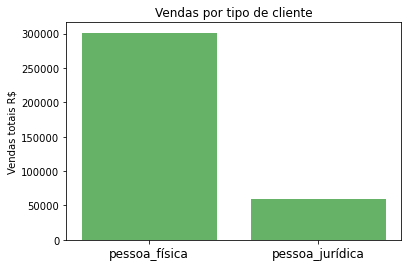

In [28]:
# gerei um gráfico com o total das receitas por tipo de cliente.
# as vendas por 'Pessoa física' são expressivamente maiores.
import matplotlib.pyplot as plt

total = vendas.groupby('tipo_cliente').sum()

tipo = [tipo for tipo, pf in total.groupby('tipo_cliente')]

plt.bar(tipo, total['preço_total'], color='green', alpha=0.60)
plt.xticks(tipo, size=12)
plt.title('Vendas por tipo de cliente')
plt.ylabel('Vendas totais R$')
plt.show()

In [29]:
# quantidade de patches e receitas por tipo de cliente
total = vendas.groupby('tipo_cliente').agg({'quantidade': 'sum', 'preço_total': 'sum'})
total

,quantidade,preço_total
tipo_cliente,,
pessoa_física,23177,301289.97
pessoa_jurídica,7448,58911.00


In [30]:
# número de pedidos feitos por tipo de clinte
# pessoa física
pf = vendas.loc[vendas['tipo_cliente'] == 'pessoa_física']
pf['n°_do_pedido'].nunique()

2075

In [31]:
# número de pedidos pessoa jurídica
pj = vendas.loc[vendas['tipo_cliente'] == 'pessoa_jurídica']
pj['n°_do_pedido'].nunique()

84

In [32]:
# criei uma coluna para inserir o total de pedidos por tipo de cliente
# o objetivo disso é calcular o tícket médio por tipo de cliente
total['pedidos'] = (2075, 84)
total

,quantidade,preço_total,pedidos
tipo_cliente,,,
pessoa_física,23177,301289.97,2075
pessoa_jurídica,7448,58911.00,84


In [33]:
# criando a coluna tícket médio
total['tícket_médio'] = total['preço_total'] / total.pedidos
total
# total do tícket médio por tipo de clinte

,quantidade,preço_total,pedidos,tícket_médio
tipo_cliente,,,,
pessoa_física,23177,301289.97,2075,145.199986
pessoa_jurídica,7448,58911.00,84,701.321429


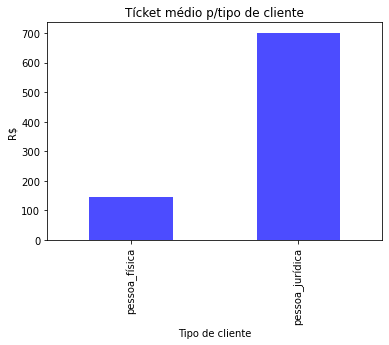

In [34]:
# plotando o gráfico do tícket médio por tipo de cliente
import matplotlib.pyplot as plt

total.tícket_médio.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Tícket médio p/tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('R$')
plt.show()
# pessoa jurídica tem um tícket médio bem superior 

In [35]:
# calculando o total de receitas
total['preço_total'].sum()

360200.96999997104

In [36]:
# calculando o peso dos tipos de cliente na receita total
pf = 301289.97 / 360200.96 * 100
pj = 58911.00 / 360200.96 * 100
(pf, pj)

(83.64496585461626, 16.355036921611756)

In [37]:
# criando a coluna peso
total['peso'] = (83.6, 16.3)
total

,quantidade,preço_total,pedidos,tícket_médio,peso
tipo_cliente,,,,,
pessoa_física,23177,301289.97,2075,145.199986,83.6
pessoa_jurídica,7448,58911.00,84,701.321429,16.3


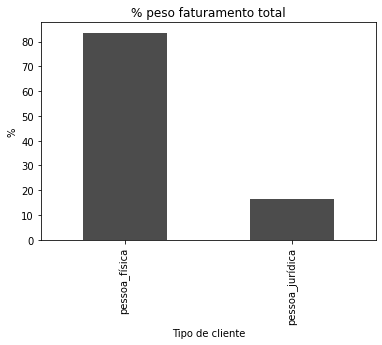

In [38]:
# plotando o gráfico da coluna peso com o impacto das receitas por tipo de cliente no total
import matplotlib.pyplot as plt

total['peso'].plot(kind='bar', color='black', alpha=0.7)

plt.title('% peso faturamento total')
plt.xlabel('Tipo de cliente')
plt.ylabel('%')
plt.show()
# mais de 80% das receitas totais concentram-se em clientes pessoa física

> Analisando as vendas por tipo de clinte fica bastante evidente que o cliente pessoa física tem um impacto muito grande nas receitas da empresa, pouco mais de 80% do faturamento total. Embora quando calculei o tícket médio, indicador bastante importante, o tipo de cliente pessoa jurídica tem um valor de 701,32, contra 145,92 do cliente pessoa física.

## Qual a quantidade unitária apareceu mais vezes nos pedidos?

In [24]:
# criando a coluna 'grupo' no dataset principal para verificar os produtos na mesma linha
# assim, consigo contar quantas unidades foram compradas em cada pedido
vendas['grupo'] = vendas.groupby('n°_do_pedido')['descrição'].transform(lambda x: ','.join(x))
vendas['n°_do_pedido'].nunique() # contando pedidos únicos

2159

In [71]:
# trazendo os dados para um novo dataset
pedidos_grupo = vendas.groupby(['grupo', 'n°_do_pedido']).agg({'quantidade': 'sum'}).sort_values(by='quantidade', ascending=False)
pedidos_grupo.head(10)

,,quantidade
grupo,n°_do_pedido,
"Patch Digital 5 x 6 cm,Patch Digital 5 cm,Patch Digital 3 x 2,4 cm,Patch Digital 5,5 x 4,4 cm",2662,1000
"Patch Digital 4,5 cm,Patch Digital 4,5 cm,Patch Digital 6 cm,Patch Digital 6 cm",1185,728
Patch Digital Personalizado sem borda somente impressão,564,600
Patch Emborrachado Personalizado 5 cm,2130,600
"Patch Bordado Personalizado – 10 cm,Patch Bordado Personalizado – 10 cm",857,500
Patch Bordado Personalizado 4 cm,2634,400
"Patch Emborrachado Personalizado 8 cm,Patch Emborrachado Personalizado 8 cm,Patch Emborrachado Personalizado 8 cm,Patch Emborrachado Personalizado 8 cm,Patch Emborrachado Personalizado 8 cm,Patch Emborrachado Personalizado 8 cm,Patch Emborrachado Personalizado 8 cm,Patch Emborrachado Personalizado 8 cm",724,320
"Patch Emborrachado Personalizado 9cm,Patch Emborrachado Personalizado 8 cm,Patch Emborrachado Personalizado 8 cm,Patch Digital 9 cm,Patch Digital 8 cm,Patch Digital 8 cm",1999,300
"Patch Bordado 6,5 cm,Patch Bordado 6,5 cm,Patch Bordado 6,5 cm,Patch Bordado Personalizado 8 cm,Patch Bordado Personalizado - 8 cm,Patch Bordado Personalizado - 8 cm,Patch Bordado Personalizado - 8 cm",1634,275


In [83]:
grupo = pedidos_grupo.value_counts() # contando oa valores por quantidade
# 340 pedidos tiveram 2 unidades compradas.
# 320 pedidos tiveram 1 unidade comprada.
grupo.head(10)

quantidade
2             340
1             320
3             232
4             201
10            177
7             150
5             142
6             103
20             43
50             42
dtype: int64

In [82]:
# quero descobrir o peso da quantidade de pedidos que contém de 1 até 10 unidades no total dos pedidos no ano de 2020.
pedidos_grupo.query('quantidade <= 10').value_counts().sum() / vendas['n°_do_pedido'].nunique()

0.7962019453450672

> O pedidos com 2 unidades são a maioria, com 340 pedidos, bem como os com 1 unidade, 320 no total. Nota-se que os pedidos estão em sua grande maioria em até 10 unidades.

## Quais tipo de patches estoque venderam mais? Qual combinação apareceram mais vezes?

### Verificando os patches de estoque

In [45]:
# criando um data frame somente com os produtos de artes prontas
estoque = vendas.loc[~vendas['descrição'].str.contains('Personalizado', na=False)]
estoque_final = estoque.loc[~estoque['descrição'].str.contains('Digital', na=False)]
estoque_final_um = estoque_final.loc[~estoque['descrição'].str.contains('personalizado', na=False)]
estoque_final_dois = estoque_final_um.loc[~estoque['descrição'].str.contains('digital', na=False)]

estoque_final_dois.head()

,n°_do_pedido,data,nome_do_contato,cpf_cnpj,estado,município,código_do_produto,descrição,quantidade,preço_total,mes,dia,tipo_cliente
0,410,2020-01-01,Matheus Oliveira Lima,139.408.067-06,RJ,Rio de Janeiro,EP1524,Patch Emborrachado Bandeira do Brasil,2,42.98,1,1,pessoa_física
2,412,2020-01-01,Luciano Tavares,382.420.019-87,SC,Joinville,EP192,Patch Bordado Brazilian Veteran | Veterano bra...,1,15.49,1,1,pessoa_física
3,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP887,Patch bordado MAD MAX - I Witness Me,1,13.49,1,2,pessoa_física
4,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP619,Patch Bordado Stars (Resident Evil),1,13.49,1,2,pessoa_física
5,413,2020-01-02,Lucas Skrock,094.709.099-17,PR,Curitiba,EP955,Patch Bordado Wolf Witcher Gerald,1,13.49,1,2,pessoa_física


> Nessa seção a ideia é limpar ao máximo tipos de patches que possam influenciar a análise dos patches de estoques e artes prontas. Dessa forma, retirei patches personalizados, que são patches com artes criadas e sugeridas pelos clientes. Patches digitais de estoque são muitos poucos no portfólio com impacto muito pequeno. 

In [46]:
# calculando a quantidade de patches vendidos desse dataset criado
estoque_final_dois['quantidade'].sum()

10002

In [47]:
estoque_final_dois['n°_do_pedido'].nunique()

1512

In [48]:
# agrupando os patches mais vendidos pelo quantidade de pedidos e quantidade vendidas
estoque_final_tres = estoque_final_dois.groupby('descrição').agg({'n°_do_pedido': 'nunique',
                                  'quantidade': 'sum'}).sort_values(by='n°_do_pedido', ascending=False).head(15)
# como sei que o portfólio é muito grande de artes de estoque, resumi pelos 15 nomes de patches que mais aparecem

estoque_final_tres

,n°_do_pedido,quantidade
descrição,,
Patch Bordado Bandeira Do Brasil Tática,195,350
Patch Emborrachado Bandeira do Brasil COLORIDA,69,263
Patch Bordado FEB (Força Expedicionária do brasil) WW2,68,92
Patch Bordado Função Assault,64,131
Patch Bordado Tipo Sanguíneo,48,67
Patch Emborrachado Punisher,48,107
Patch Bordado (Manicaca) Assault,47,60
Patch Bordado Bandeira São Paulo,46,91
Patch Emborrachado Tipo Sanguíneo Preto,46,72


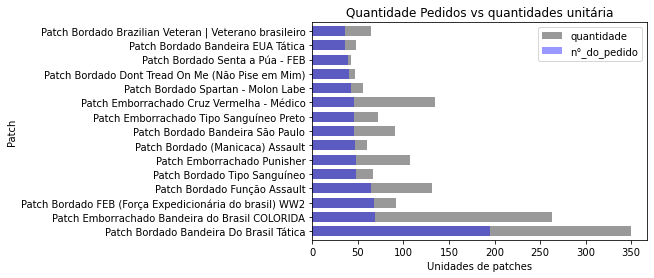

In [49]:
# plotei um gráfico de barras horizontais para melhor vizualizar a quantidade e nr. de pedidos desses patches
estoque_final_tres['quantidade'].plot(kind='barh', alpha=0.4, color='black', width=0.7)
estoque_final_tres['n°_do_pedido'].plot(kind='barh', alpha=0.4, color='blue', width=0.7)
plt.title('Quantidade Pedidos vs quantidades unitária')
plt.legend()
plt.xlabel('Unidades de patches')
plt.ylabel('Patch')
plt.show();

> Conforme o gráfico acima, podemos dizer que o 'Patch Bordado Bandeira Do Brasil Tática' foi o campeão em quantidade e nr de pedidos no qual aparecem, ressaltando que são patches de estoque e artes prontas. Vale destacar também o patch 'Patch Emborrachado Bandeira do Brasil COLORIDA' com quantidade expressiva de ambos os indicadores. Nesse tópico resolvi não incluir receitas porque preço unitário é o mesmo para todos, até o presente momento. Com base nesse gráfico o que a empresa pode fazer é se antecipar a demanda e produzir estoque desses modelos para encurtar o prazo de entrega e medir esses indicadores no futuro.

### Verificando as combinações que mais venderam juntos

In [50]:
# aqui criei uma coluna no mesmo dataset da seção anterior para colocar todos os produtos em uma só linha de cada pedido
# nesse caso estou mudando a estrutura do dataset somente para responder a segunda pergunta do tópico
estoque_final_dois['grupo'] = estoque_final_dois.groupby('n°_do_pedido')['descrição'].transform(lambda x: ','.join(x))
estoque_final_quatro = estoque_final_dois[['n°_do_pedido', 'grupo']].drop_duplicates()
estoque_final_quatro.head()

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,n°_do_pedido,grupo
0,410,Patch Emborrachado Bandeira do Brasil
2,412,Patch Bordado Brazilian Veteran | Veterano bra...
3,413,"Patch bordado MAD MAX - I Witness Me,Patch Bor..."
7,414,Patch Bordado Cartel Santa Blanca
9,415,Patch bordado Bandeira Japão


In [63]:
# aqui pretendo descbrir quais os melhores pares de patches vendidos juntos
# achei um vídeo incrível que aborda os pacotes Counter e combinations
# aqui o vídeo no qual descobri os pacotes e resolvi o problema, https://www.youtube.com/watch?v=eMOA1pPVUc4&t=2678s
from itertools import combinations
from collections import Counter

count = Counter() # criando a variável count com o 'Counter() do pacote 'collections'

for row in estoque_final_quatro['grupo']: # percorrendo cada linha da variável 'grupo'.
    row_list = row.split(',') # separando pela vírgula, ou seja, por produto.
    count.update(Counter(combinations(row_list, 5))) # fazendo a contagem e depois a combinação da variável
    # 'row_list' de cinco produtos (5).

for key, value in count.most_common(10): # percorrendo cada linha e trazendo os 10 maiores.
    print(key, value) # mostrando 'chave' e 'valor' ou 'nome do produto' e 'quantidade de pedidos'

('Patch Bordado Função Assault', 'Patch Bordado Função Forças Especiais\xa0', 'Patch Bordado Função Forças Especiais\xa0', 'Patch Bordado Bandeira Do Brasil Tática', 'Patch Bordado Bandeira São Paulo') 288
('Patch Bordado Função Assault', 'Patch Bordado Função Forças Especiais\xa0', 'Patch Bordado Bandeira Do Brasil Tática', 'Patch Bordado Bandeira Do Brasil Tática', 'Patch Bordado Bandeira São Paulo') 288
('Patch Bordado Função Assault', 'Patch Bordado Função Forças Especiais\xa0', 'Patch Bordado Bandeira Do Brasil Tática', 'Patch Bordado Bandeira São Paulo', 'Patch Bordado Bandeira São Paulo') 288
('Patch Bordado A Cobra Fumou-FEB', 'Patch Bordado Função Assault', 'Patch Bordado Função Forças Especiais\xa0', 'Patch Bordado Bandeira Do Brasil Tática', 'Patch Bordado Bandeira São Paulo') 192
('Patch Bordado Armeiro', 'Patch Bordado Função Assault', 'Patch Bordado Função Forças Especiais\xa0', 'Patch Bordado Bandeira Do Brasil Tática', 'Patch Bordado Bandeira São Paulo') 192
('Patch Bor

> Para responder as perguntas desse tópico precisei mudar a estrutura do dataset original e excluir dois tipos de patches vendidos, os personalizados e digitais. Assim criei um grupo dos produtos vendidos e os coloquei na mesma linha, dessa forma consegui filtrar por pedido. Com os pacotes 'combinatios' e 'Counter' consegui responder a pergunta de uma forma clara e relevante. Na lista acima aparecem o conjunto de cinco patches que mais aparecem nos pedidos, com base no dataset modificado em que aparecem somente patches de artes prontas.

## Conclusão

No referido trabalho tentei responder as principais questões abordadas do que ocorreu no ano de 2020 em uma empresa de confecção de patches.

Na primeira parte do projeto fiz a limpeza e transformação dos dados disponíveis, excluindo valores nulos, verificando valores duplicados e criando as colunas mês e dia, no qual seriam necessários para responder algumas perguntas do projeto.

Analisando os dados consegui identificar o faturamento de todos os meses do ano, bem como fazer um comparativo de cada um, sendo Outubro o mês com maior faturamento, bem como a tendência de faturamento no ano. Os dias do mês no qual se vende mais, também foi respondido, os estados que mais compraram durante o ano, de fato São Paulo foi o que mais comprou.

O tipo de cliente também foi analisado, sendo o impacto dos clientes pessoa física maior do que pessoa jurídica, embora esse último tenha um tícket médio bem maior.

A empresa possui muitos pedidos que contém 1 unidade, isso refletiu 69% dos pedidos no ano, me parece um número bastante alto depedendo da estratégia da empresa talvez não seja eficiente.

Por último era necessário responder qual foi a performance de patches de artes prontas, isto que o negócio principal da empresa são de ates personalizadas. O 'patch bordado bandeira do brasil tática', foi o que mais vendeu e o que mais apareceu nos pedidos. Tive que responder qual seriam a combinação dos 5 patches que mais apareceram nos pedidos, no qual tive que buscar outros pacotes para respondê-lo.

## Limitações

Durante todo o processo de análise tive poucas limitações para responder as perguntas do projeto. A principal, acredito, a maneira como foram lançados os nomes dos produtos. Não há um padrão na descrição, logo os códigos dos produtos também não.

Os produtos não estão lançados por grupos ou tipos, acredito que isso poderia melhorar as análises e perguntas do projeto. As descrições estavam bastante 'sujas', principalmente os produtos ditos 'personalizados'.

## Verificando quantidades vs pedidos

#### Artes prontas

In [64]:
estoque_final_dois.head(1)

,n°_do_pedido,data,nome_do_contato,cpf_cnpj,estado,município,código_do_produto,descrição,quantidade,preço_total,mes,dia,tipo_cliente,grupo
0,410,2020-01-01,Matheus Oliveira Lima,139.408.067-06,RJ,Rio de Janeiro,EP1524,Patch Emborrachado Bandeira do Brasil,2,42.98,1,1,pessoa_física,Patch Emborrachado Bandeira do Brasil


In [52]:
# dataset com os pedidos de artes prontas
pedidos = estoque_final_dois.groupby(['grupo', 'n°_do_pedido']).agg({'quantidade': 'sum',
                                           'preço_total': 'sum'}).sort_values(by='quantidade')
pedidos.head()

quantidade  \
grupo                                          n°_do_pedido               
Patch Bordado Jurassic Park                    1142                   1   
Patch Bordado HellFish                         2586                   1   
Patch Bordado Para Colete Instrutor            2479                   1   
                                               930                    1   
Patch Emborrachado Bandeira do Brasil NEGATIVA 1389                   1   

                                                             preço_total  
grupo                                          n°_do_pedido               
Patch Bordado Jurassic Park                    1142                12.79  
Patch Bordado HellFish                         2586                 9.00  
Patch Bordado Para Colete Instrutor            2479                27.00  
                                               930                 20.00  
Patch Emborrachado Bandeira do Brasil NEGATIVA 1389                21.49

In [53]:
(pedidos['quantidade'] == 1).value_counts()
# 308 pedidos com 1 unidade

False    1204
True      308
Name: quantidade, dtype: int64

In [54]:
(pedidos['quantidade'] == 5).value_counts()
# 129 pedidos com 5 unidades

False    1383
True      129
Name: quantidade, dtype: int64

In [55]:
# quantidade de pedidos versus quantidade de unidades
# confirmando os cálculos anteriores
(pedidos['quantidade']).value_counts()

1      308
2      283
3      221
4      166
5      129
6      102
7       95
8       28
10      27
9       21
11      17
20       9
12       9
15       8
30       8
13       7
14       7
25       5
40       5
50       5
60       5
19       4
18       3
16       3
17       3
22       3
100      3
160      3
21       2
32       2
33       2
81       1
117      1
153      1
180      1
90       1
185      1
235      1
86       1
53       1
77       1
65       1
24       1
245      1
34       1
36       1
45       1
46       1
48       1
250      1
Name: quantidade, dtype: int64